In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from skimage.feature import hog
from skimage import data, color, io

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score

In [3]:
import numpy as np

In [4]:
from PIL import Image

loading and display data 

In [5]:
labels = pd.read_csv(
'/Users/juansantateresagomez/Desktop/small_DS_exercises/juan/Projects/dataset/train_labels.csv', index_col=0)

In [6]:
labels.head()

,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


In [7]:
def get_image(row_id, 
              root='/Users/juansantateresagomez/Desktop/small_DS_exercises/juan/Projects/dataset/images/train/'):
    
    filename = '{}.jpg'.format(row_id)
    file_path = os.path.join(root, filename)
    img = Image.open(file_path)
    return np.array(img)

In [8]:
apis_row = labels[labels.genus == 0.0].index[5]

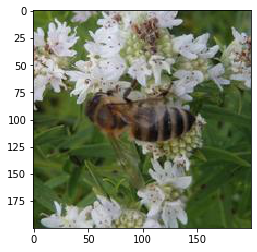

In [9]:
plt.imshow(get_image(apis_row))

In [10]:
bombus_row = labels[labels['genus']==1.0].index[5]

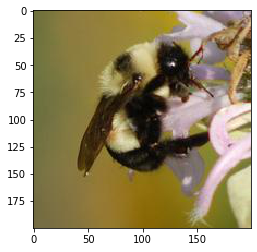

In [11]:
plt.imshow(get_image(bombus_row))

Color bombus image has shape:  (200, 200, 3)
Greyscale bombus image has shape:  [[0.42341176 0.42341176 0.42565176 ... 0.60022157 0.60920353 0.65796667]
 [0.42341176 0.42341176 0.42565176 ... 0.62485216 0.60357765 0.61144353]
 [0.42341176 0.42341176 0.42565176 ... 0.67189608 0.61699412 0.55424902]
 ...
 [0.41551529 0.41551529 0.41551529 ... 0.68323137 0.67736039 0.66139137]
 [0.41551529 0.41551529 0.41551529 ... 0.68771843 0.6891251  0.67707765]
 [0.41551529 0.41551529 0.41551529 ... 0.68771843 0.69696824 0.6891251 ]]


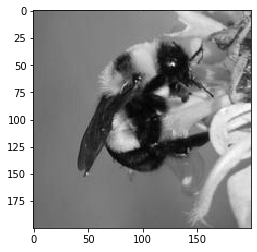

In [12]:
# load a bombus image using our get_image function and bombus_row from the previous cell
bombus = get_image(bombus_row)

# print the shape of the bombus image
print('Color bombus image has shape: ', bombus.shape)

# convert the bombus image to greyscale
grey_bombus = color.rgb2grey(bombus)

# show the greyscale image
plt.imshow(grey_bombus, cmap='gray')

# greyscale bombus image only has one channel
print('Greyscale bombus image has shape: ', grey_bombus)

In [13]:
from skimage.feature import hog

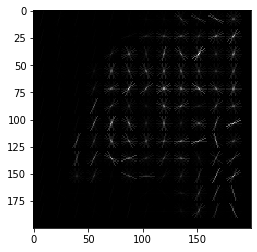

In [14]:
# run HOG using our greyscale bombus image
hog_features, hog_image = hog(grey_bombus,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a grey colormap
plt.imshow(hog_image, cmap='gray')

In [15]:
def create_features(img):
    color_features = np.ndarray.flatten(img)
    grey_image = color.rgb2grey(img)
    hog_features = hog(
        grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    flat_features = np.hstack((color_features, hog_features))
    return flat_features

In [16]:
bombus_features = create_features(bombus)

Loop over features to preprocess

In [19]:
def create_features_matrix(label_dataframe):
    features_list = []
    
    for img_id in label_dataframe.index:
        
        img = get_image(img_id)
        image_features = create_features(img)
        features_list.append(image_features)
        
    feature_matrix = np.array(features_list)
    
    return feature_matrix




In [20]:
feature_matrix = create_features_matrix

In [ ]:
from sklearn